In [295]:
import pandas as pd

In [296]:
from matplotlib import pyplot as plt

In [297]:
import seaborn as sns

In [298]:
#Leggo i file
apps = pd.read_csv("data/googleplaystore.csv")
reviews = pd.read_csv("data/googleplaystore_user_reviews.csv")

In [299]:
#Esplorare la struttura dei dati
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [300]:
#Esplorare la struttura dei dati
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [301]:
#Esplorare la struttura dei dati
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [302]:
#Esplorare la struttura dei dati
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [303]:
#Esplorare il range di dati
apps.shape

(10841, 13)

In [304]:
#Esplorare il range di dati
reviews.shape

(64295, 5)

In [305]:
#Rimuovere i valori nulli
apps.dropna(inplace=True)

In [306]:
#Rimuovere i valori nulli
reviews.dropna(inplace=True)

In [307]:
#Esploro le caratteristiche generali
apps['Installs'].describe()

count           9360
unique            19
top       1,000,000+
freq            1576
Name: Installs, dtype: object

In [308]:
#Esploro le caratteristiche generali
apps['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [309]:
#Esploro le caratteristiche generali
apps['Type'].value_counts()

Type
Free    8715
Paid     645
Name: count, dtype: int64

In [310]:
#Esploro le caratteristiche generali
apps['Price'].describe()

count     9360
unique      73
top          0
freq      8715
Name: Price, dtype: object

In [311]:
#Esploro le caratteristiche generali
apps['Category'].value_counts()

Category
FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

In [312]:
#Creo un campo int per le installazioni
apps['InstallsInt'] = apps['Installs'].str.replace(',', '').str.extract('(\d+)').astype(int)

In [313]:
#Studio la correlazione tra punteggio, recensioni e installazioni
correlation_matrix = apps[['Rating', 'Reviews', 'InstallsInt']].corr()

In [314]:
#Studio la correlazione tra punteggio, recensioni e installazioni
correlation_matrix

,Rating,Reviews,InstallsInt
Rating,1.000000,0.068133,0.051337
Reviews,0.068133,1.000000,0.641605
InstallsInt,0.051337,0.641605,1.000000


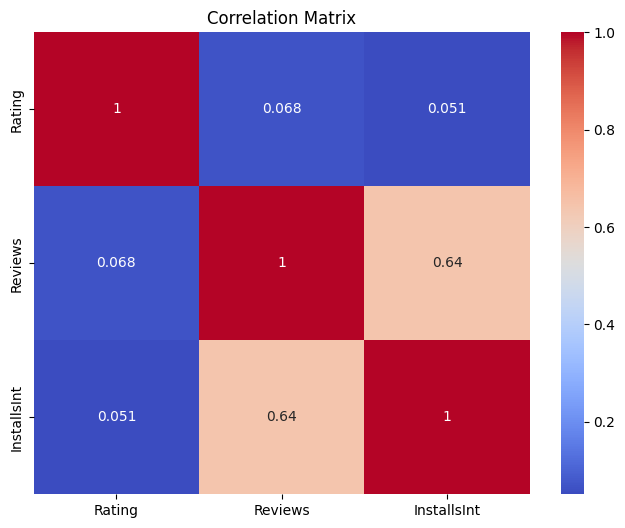

In [315]:
#Creo un grafico di correlazione
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [316]:
# Conteggio delle app per categoria
countAppsxCat = apps['Category'].value_counts()

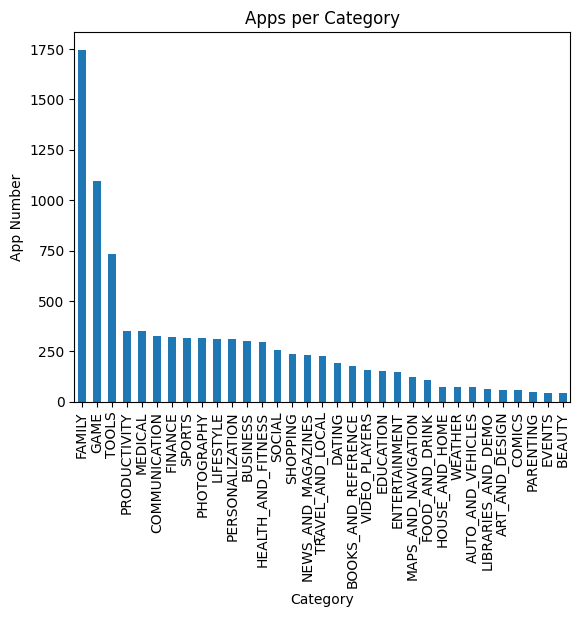

In [317]:
#Creo un grafico delle app per categoria
countAppsxCat.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('App Number')
plt.title('Apps per Category')
plt.show()

In [318]:
#Media dei punteggi per categoria
avgRatxCat = apps.groupby('Category')['Rating'].mean()

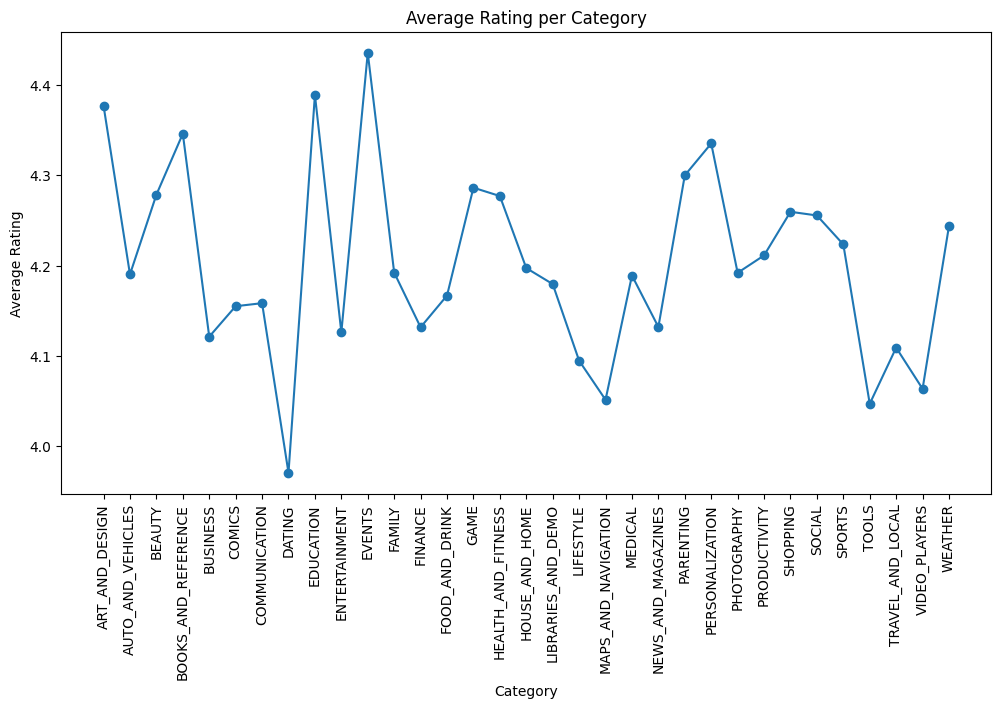

In [319]:
#Creo un grafico della media dei punteggi per categoria
plt.figure(figsize=(12, 6))
plt.plot(avgRatxCat.index, avgRatxCat.values, marker='o')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating per Category')
plt.xticks(rotation=90)
plt.show()

In [320]:
#Conteggio delle recensioni per categoria
CountRevxCat = apps.groupby('Category')['Reviews'].count()

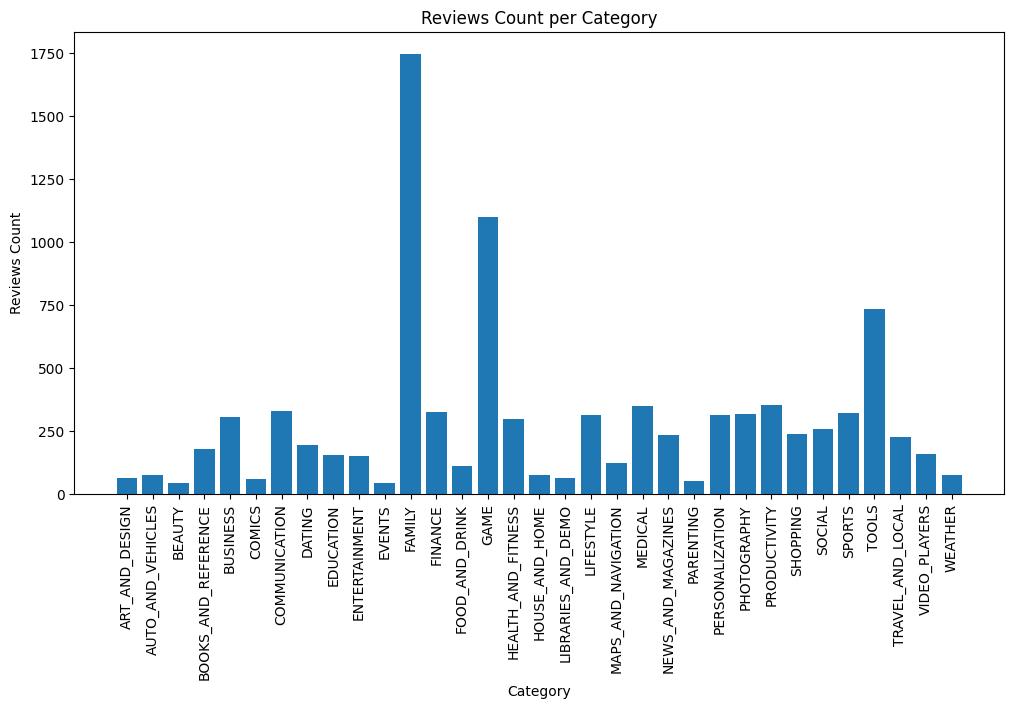

In [321]:
#Creo un grafico con le recensioni per categoria
plt.figure(figsize=(12, 6))
plt.bar(CountRevxCat.index, CountRevxCat.values)
plt.xlabel('Category')
plt.ylabel('Reviews Count')
plt.title('Reviews Count per Category')
plt.xticks(rotation=90)
plt.show()

In [322]:
#Esploro le app per le categorie più interessanti
event_apps = apps.loc[apps['Category'] == 'EVENTS']

In [323]:
#Esploro le app per le categorie più interessanti
event_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsInt
1004,All Events in City,EVENTS,4.0,3782,9.5M,"100,000+",Free,0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up,100000
1005,Ticketmaster Event Tickets,EVENTS,4.0,40113,36M,"5,000,000+",Free,0,Everyone,Events,"July 23, 2018",Varies with device,Varies with device,5000000
1006,Reminder,EVENTS,4.5,7074,6.3M,"500,000+",Free,0,Everyone,Events,"June 25, 2018",1.57,4.1 and up,500000
1007,Birdays - Birthday reminder,EVENTS,4.5,2153,5.9M,"50,000+",Free,0,Everyone,Events,"December 14, 2017",1.5.0,4.1 and up,50000
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.0,26089,Varies with device,"5,000,000+",Free,0,Everyone,Events,"August 2, 2018",4.2.1,Varies with device,5000000
1009,Fever,EVENTS,4.0,20611,12M,"1,000,000+",Free,0,Teen,Events,"July 18, 2018",4.3.6,4.1 and up,1000000
1010,DroidAdmin for Android - Advice,EVENTS,4.2,811,2.8M,"10,000+",Free,0,Everyone,Events,"May 29, 2018",3.8,4.0 and up,10000
1011,"SeatGeek – Tickets to Sports, Concerts, Broadway",EVENTS,4.4,15558,26M,"1,000,000+",Free,0,Everyone,Events,"August 3, 2018",2018.07.31229,5.0 and up,1000000
1012,my4D,EVENTS,4.6,573,8.7M,"100,000+",Free,0,Everyone,Events,"July 12, 2018",1.40,4.2 and up,100000
1014,Vivid Seats – Event Tickets,EVENTS,4.6,8232,53M,"1,000,000+",Free,0,Everyone,Events,"July 31, 2018",Varies with device,5.0 and up,1000000


In [324]:
#Esploro le app per le categorie più interessanti
game_apps = apps.loc[apps['Category'] == 'GAME']

In [325]:
#Esploro le app per le categorie più interessanti
game_apps 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsInt
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,100000000
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,500000000
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up,10000000
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up,50000
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up,1000000
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up,500000
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up,1000000


In [326]:
#Esploro le app per le categorie più interessanti
education_apps = apps.loc[apps['Category'] == 'EDUCATION']

In [327]:
#Esploro le app per le categorie più interessanti
education_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsInt
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,100000000
700,TED,EDUCATION,4.6,181893,18M,"10,000,000+",Free,0,Everyone 10+,Education,"July 27, 2018",3.2.5,4.1 and up,10000000
701,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,18M,"100,000+",Free,0,Everyone,Education,"December 29, 2017",3.1,4.0 and up,100000
702,Khan Academy,EDUCATION,4.6,85375,21M,"5,000,000+",Free,0,Everyone,Education,"July 27, 2018",5.0.0,4.1 and up,5000000
703,Learn English with Wlingua,EDUCATION,4.7,314299,3.3M,"10,000,000+",Free,0,Everyone,Education,"May 2, 2018",1.94.9,4.0 and up,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,Blinkist - Nonfiction Books,EDUCATION,4.1,16103,13M,"1,000,000+",Free,0,Everyone,Education,"July 31, 2018",5.7.1,4.1 and up,1000000
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63M,"1,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up,1000
852,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,44M,"1,000+",Paid,$5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up,1000
853,Toca Life: City,EDUCATION,4.7,31085,24M,"500,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up,500000


In [328]:
#Esploro le app per le categorie più interessanti
art_apps = apps.loc[apps['Category'] == 'ART_AND_DESIGN']

In [329]:
#Esploro le app per le categorie più interessanti
art_apps 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsInt
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.0,18,3.6M,"1,000+",Free,0,Everyone,Art & Design,"March 22, 2018",1.1,4.0 and up,1000
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41,1.9M,"5,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.0.2,4.0 and up,5000
8679,Dp for girls,ART_AND_DESIGN,4.2,175,8.2M,"50,000+",Free,0,Everyone,Art & Design,"May 26, 2017",1.2,4.0.3 and up,50000
8712,Name Art DP - Focus n Filter Text 2018,ART_AND_DESIGN,4.3,132,7.7M,"10,000+",Free,0,Everyone,Art & Design,"January 4, 2018",1,4.1 and up,10000


In [330]:
#Converto il nome delle app in minuscolo in un nuovo campo per poterle filtrare per contenuto
apps['AppLowercase'] = apps['App'].str.lower()

In [331]:
#Esploro in quali campi è usata maggiormente l'AI
ai_apps = apps[apps['AppLowercase'].str.startswith('ai ', na=False) | apps['AppLowercase'].str.endswith(' ai', na=False)]

In [332]:
ai_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallsInt,AppLowercase
5179,Ai illustrator viewer,ART_AND_DESIGN,3.4,486,5.9M,"100,000+",Free,0,Everyone,Art & Design,"July 26, 2018",5.7,5.0 and up,100000,ai illustrator viewer
5180,Real AI,FAMILY,3.8,949,1.2M,"50,000+",Free,0,Everyone,Entertainment,"July 22, 2018",4.9,4.0 and up,50000,real ai
5188,Ai File Viewer,TOOLS,4.0,66,Varies with device,"10,000+",Free,0,Everyone,Tools,"July 7, 2018",Varies with device,Varies with device,10000,ai file viewer
5192,AI Face Beauty Analysis - IntelliFace (Free),BEAUTY,3.1,40,13M,"10,000+",Free,0,Everyone,Beauty,"April 11, 2018",20,4.1 and up,10000,ai face beauty analysis - intelliface (free)
5195,AI Benchmark,TOOLS,4.0,97,99M,"5,000+",Free,0,Everyone,Tools,"June 29, 2018",2.0.0,4.1 and up,5000,ai benchmark
5196,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43,2.3M,100+,Free,0,Everyone,News & Magazines,"June 22, 2018",1.0,4.4 and up,100,ai today : artificial intelligence news & ai 101
5203,Virtual Eye AI,TOOLS,4.4,26,3.8M,500+,Free,0,Everyone,Tools,"May 27, 2018",1.2,4.0 and up,500,virtual eye ai
5206,ai robot keyboard,PERSONALIZATION,4.7,1891,1.9M,"100,000+",Free,0,Everyone,Personalization,"May 24, 2018",10001008,4.0.3 and up,100000,ai robot keyboard
5207,AI with Python Tutorial,FAMILY,4.4,8,3.3M,"5,000+",Free,0,Everyone,Education,"June 5, 2018",1.0.4,4.1 and up,5000,ai with python tutorial
5215,AI Draw | Art Filter for Selfie,PHOTOGRAPHY,3.0,20,4.3M,"1,000+",Paid,$2.99,Everyone,Photography,"June 18, 2018",1.4.7,5.0 and up,1000,ai draw | art filter for selfie


In [333]:
#Studio la correlazione tra punteggio, recensioni e installazioni
event_correlation_matrix = event_apps[['Rating', 'Reviews', 'InstallsInt']].corr()

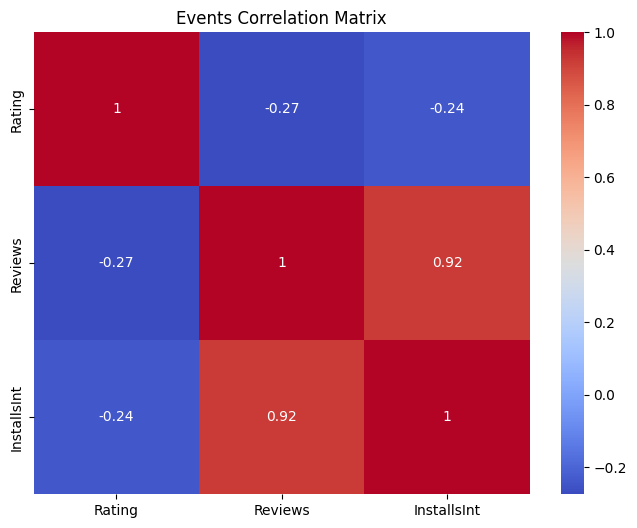

In [334]:
#Creo un grafico di correlazione sulle app della categoria EVENTS
plt.figure(figsize=(8, 6))
sns.heatmap(event_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Events Correlation Matrix')
plt.show()

In [335]:
#Deduzione: Fare un'app che rilevi gli eventi vicini con l'AI attraverso articoli e siti
#e li suggerisca agli utenti in base alle loro preferenze

#Perchè? Nella categoria eventi ci sono poche app,
# i risultati delle correlazioni sembrano generalmente buoni e una buona app può 
#ampliare il target puntando sulla versatilità e portando ottimi risultati nel campo